### Library Import

In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bitcoin.csv')

In [3]:
data

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992000,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446000,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03 00:00:00.000,286.572000,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04 00:00:00.000,260.936000,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05 00:00:00.000,273.220000,1.550381e+08,3.740880e+09,bitcoin
...,...,...,...,...,...
3368,2024-03-23 00:00:00.000,63509.044965,4.243660e+10,1.247366e+12,bitcoin
3369,2024-03-24 00:00:00.000,64285.802791,2.548993e+10,1.264722e+12,bitcoin
3370,2024-03-25 00:00:00.000,67310.983268,2.809832e+10,1.323456e+12,bitcoin
3371,2024-03-26 00:00:00.000,69938.945302,4.482031e+10,1.371797e+12,bitcoin


In [4]:
# Display column names in DataFrame 'data'
data.columns

Index(['date', 'price', 'total_volume', 'market_cap', 'coin_name'], dtype='object')

Column Information : 

- date : date of observation - the price is taken at 00:00:00 hours
- price : Price at the given date and time
- total_volume : volume of transactions on the given day
- market_cap : Market capitalization in USD

In [5]:
# Display the number of rows and columns in the 'data' DataFrame
data.shape

(3373, 5)

Data are available for 3373 observations

In [6]:
# Duplicate data
data.duplicated().sum()

np.int64(0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3373 non-null   object 
 1   price         3373 non-null   float64
 2   total_volume  3373 non-null   float64
 3   market_cap    3372 non-null   float64
 4   coin_name     3373 non-null   object 
dtypes: float64(3), object(2)
memory usage: 131.9+ KB


## Missing Values

In [8]:
# Chekcing missing values
data.isnull().sum()

date            0
price           0
total_volume    0
market_cap      1
coin_name       0
dtype: int64

In [9]:
# Median calculation
mean_market_cap = data['market_cap'].mean()

# Imputation of missing values with the mean
data['market_cap'].fillna(mean_market_cap, inplace=True)

C:\Users\ousma\AppData\Local\Temp\ipykernel_6924\937183904.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['market_cap'].fillna(mean_market_cap, inplace=True)


In [10]:
# Chekcing missing values
data.isnull().sum()

date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

In [11]:
data.describe()

,price,total_volume,market_cap
count,3373.000000,3.373000e+03,3.373000e+03
mean,16010.058094,1.724184e+10,3.008013e+11
std,17194.074719,1.883256e+10,3.296433e+11
min,172.147900,1.823845e+07,2.362640e+09
25%,1280.986000,1.454057e+09,2.088487e+10
50%,8881.391704,1.237354e+10,1.584130e+11
75%,26848.239940,2.743276e+10,5.211536e+11
max,73097.767027,1.788941e+11,1.436631e+12


### Outliers data

<Axes: >

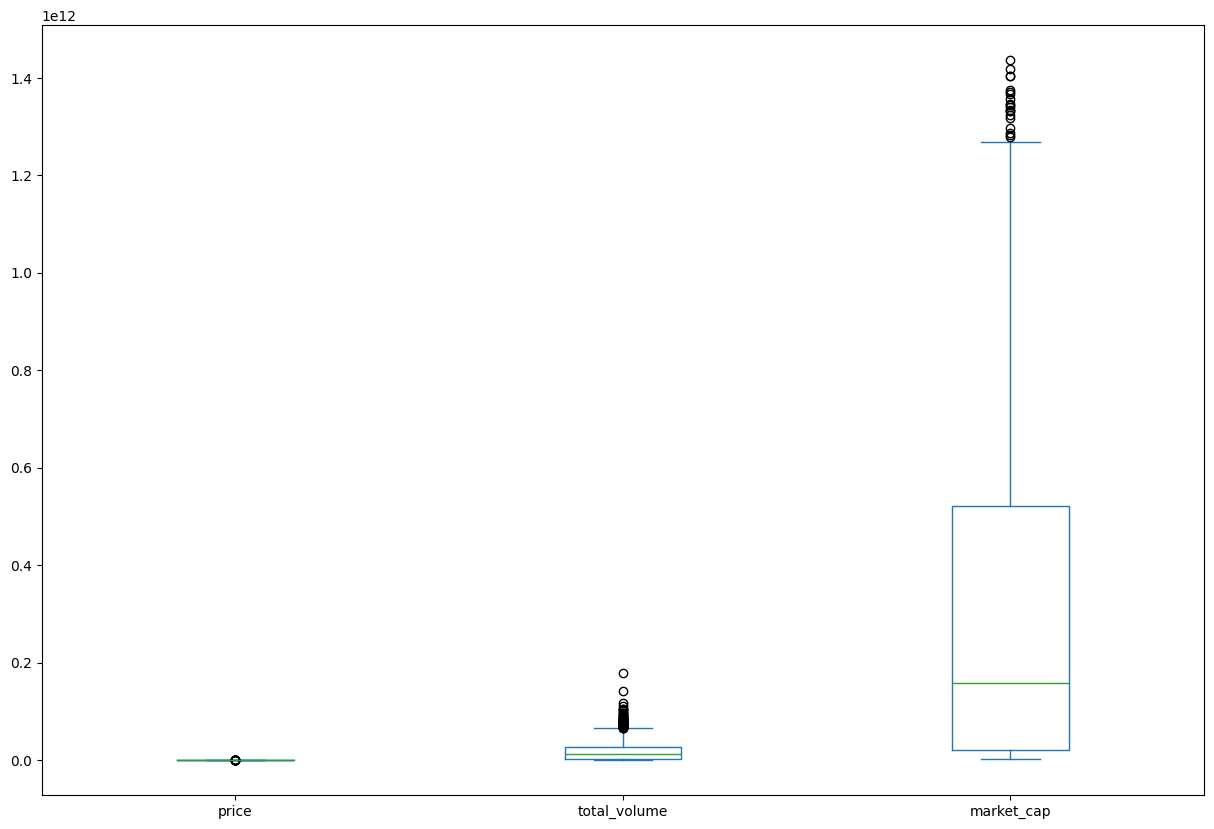

In [12]:
data.plot(kind="box", figsize=(15,10))

In [13]:
data_num = data.select_dtypes(include=['number'])

IQR = data_num.quantile(0.75) - data_num.quantile(0.25)
outliers_min = data_num.quantile(0.25) - 1.5 * IQR
outliers_max = data_num.quantile(0.75) + 1.5 * IQR

In [14]:
((data_num<outliers_min) | (data_num>outliers_max)).sum()

price           23
total_volume    75
market_cap      20
dtype: int64

In [15]:
((data_num<outliers_min) | (data_num>outliers_max)).sum()/data.shape[0]*100

price           0.681886
total_volume    2.223540
market_cap      0.592944
dtype: float64

### 'price' Analysis (The variable to be predicted)

In [16]:
data

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992000,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446000,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03 00:00:00.000,286.572000,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04 00:00:00.000,260.936000,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05 00:00:00.000,273.220000,1.550381e+08,3.740880e+09,bitcoin
...,...,...,...,...,...
3368,2024-03-23 00:00:00.000,63509.044965,4.243660e+10,1.247366e+12,bitcoin
3369,2024-03-24 00:00:00.000,64285.802791,2.548993e+10,1.264722e+12,bitcoin
3370,2024-03-25 00:00:00.000,67310.983268,2.809832e+10,1.323456e+12,bitcoin
3371,2024-03-26 00:00:00.000,69938.945302,4.482031e+10,1.371797e+12,bitcoin


In [17]:
data.describe().price

count     3373.000000
mean     16010.058094
std      17194.074719
min        172.147900
25%       1280.986000
50%       8881.391704
75%      26848.239940
max      73097.767027
Name: price, dtype: float64

<Axes: ylabel='Density'>

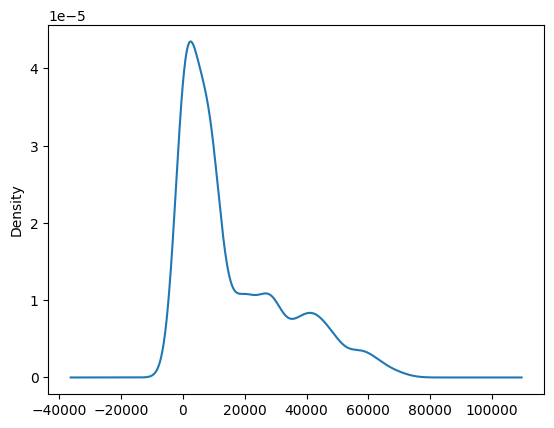

In [18]:
data.price.plot(kind = 'density')

In [19]:
from scipy import stats
stat, p = stats.shapiro(data['price'])
if p > 0.05:
    print("The data appear to follow a normal distribution.")
else:
    print("The data do not follow a normal distribution.")


The data do not follow a normal distribution.


In [20]:
Q1=data.price.quantile(0.25)  # the first quartile
Q3=data.price.quantile(0.75)   # the third quartile
IQR=Q3-Q1     # the interquartile range
low=Q1-1.5*IQR
high=Q3+1.5*IQR

In [21]:
high

np.float64(65199.12084898115)

In [22]:
low

np.float64(-37069.89490938869)

All 'price' greater than 65199.12084898115 or less than -37069.89490938869 can be considered outliers (abnormal, atypical, anomalies).

In [23]:
((data.price<low) | (data.price>high)).sum()

np.int64(23)

In [24]:
((data.price<low) | (data.price>high)).sum()/data.shape[0]*100

np.float64(0.6818855618144086)

There are 23 outliers in the 'price' column. Which represents 0.68% of the prices

<Axes: >

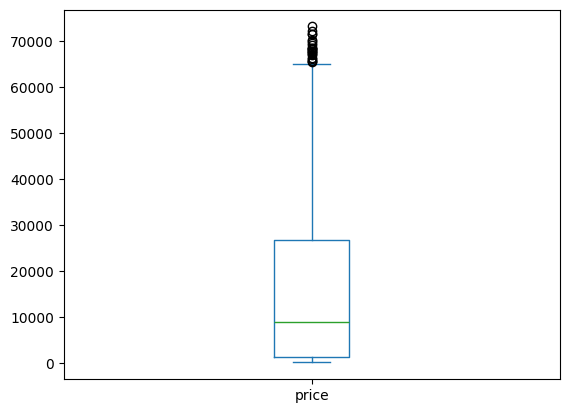

In [25]:
data.price.plot(kind="box")

In our dataset, we have 3373 observations. The prices range from 172.147900 to 73097.767027, with an average of 16010.058094. 50% of price are below 8881.391704, 25% are below 1280.986000 and 25% are above 26848.239940. Prices below -37069.89490938869 and above 65199.12084898115 can be considered outliers, and there are 24 outliers for this variable. The curve representing the prices shows that it does not follow the normal distribution.

In [26]:
# Rename columns for Prophet
data_prophet = data.rename(columns={"date": "ds", "price": "y"})

In [27]:
# Convert column 'ds' to datetime format
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'])

# Select the columns of interest
data_prophet = data_prophet[['ds', 'y']]

In [28]:
data_prophet

,ds,y
0,2015-01-01,313.992000
1,2015-01-02,314.446000
2,2015-01-03,286.572000
3,2015-01-04,260.936000
4,2015-01-05,273.220000
...,...,...
3368,2024-03-23,63509.044965
3369,2024-03-24,64285.802791
3370,2024-03-25,67310.983268
3371,2024-03-26,69938.945302


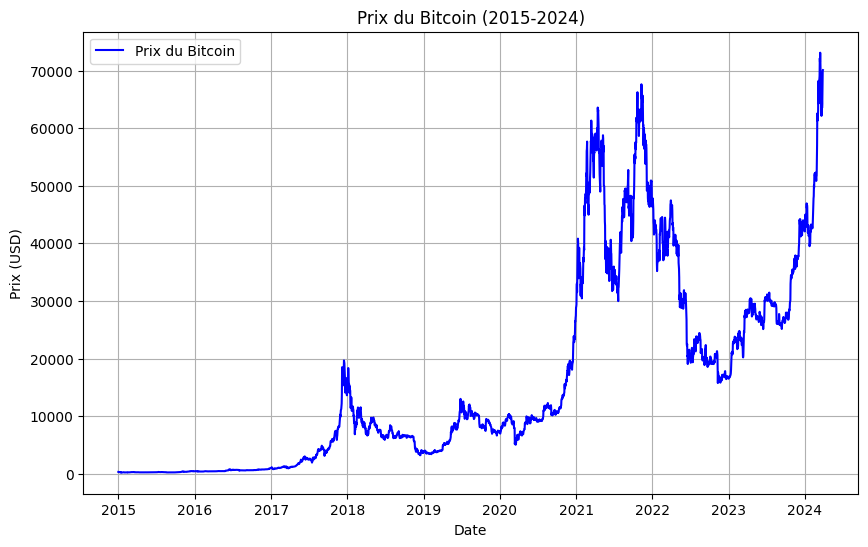

In [29]:
# View initial data
plt.figure(figsize=(10, 6))
plt.plot(data_prophet['ds'], data_prophet['y'], label="Prix du Bitcoin", color='blue')
plt.title("Prix du Bitcoin (2015-2024)")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.legend()
plt.grid()
plt.show()

The chart reveals a marked upward trend in the price of Bitcoin over the period 2015-2024. This exponential growth is characteristic of this cryptocurrency and has attracted the attention of many investors.

In [31]:
import plotly.express as px
fig = px.line(data, x='date', y='price', title="Prix du Bitcoin")

In [32]:
import plotly.io as pio
pio.renderers.default = "browser"
fig.show()

### Dickey-Fuller Test : Using Prophet does not require data to be stationary, but let's check stationarity anyway.

In [33]:
# Import library for testing
from statsmodels.tsa.stattools import adfuller

# Apply the Dickey-Fuller test to the 'y' column (Bitcoin price)
result = adfuller(data_prophet['y'])

# Display results
print("Test de Dickey-Fuller Augmenté (ADF)")
print("-------------------------------------")
print(f"Statistique de test : {result[0]}")
print(f"p-valeur : {result[1]}")
print(f"Nombre de retards utilisés : {result[2]}")
print(f"Nombre d'observations : {result[3]}")
print("Valeurs critiques :")
for key, value in result[4].items():
    print(f"   {key} : {value}")

# Interpretation of results
if result[1] <= 0.05:
    print("\nConclusion : La série est stationnaire (on rejette l'hypothèse nulle).")
else:
    print("\nConclusion : La série n'est PAS stationnaire (on ne rejette pas l'hypothèse nulle).")


Test de Dickey-Fuller Augmenté (ADF)
-------------------------------------
Statistique de test : -0.3513367580570906
p-valeur : 0.9179122470585899
Nombre de retards utilisés : 29
Nombre d'observations : 3343
Valeurs critiques :
   1% : -3.432307621401763
   5% : -2.862404962641299
   10% : -2.5672304368122156

Conclusion : La série n'est PAS stationnaire (on ne rejette pas l'hypothèse nulle).


## APPLY PROPHET

11:49:47 - cmdstanpy - INFO - Chain [1] start processing
11:49:49 - cmdstanpy - INFO - Chain [1] done processing


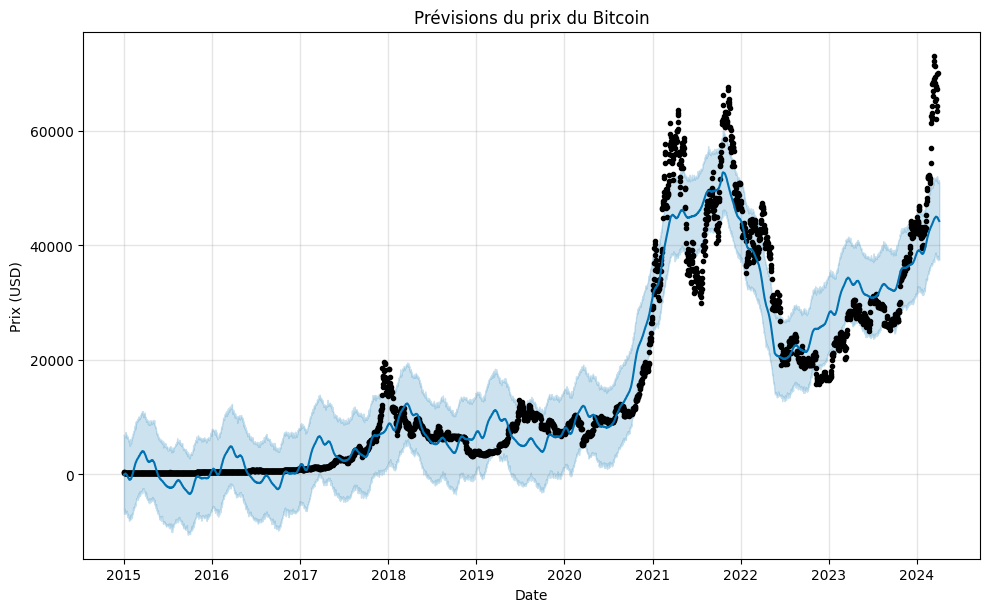

In [44]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prophet model initialization
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Fit the model to the data
model.fit(data_prophet)

# Making forecasts
future = model.make_future_dataframe(periods=7)  # Ajouter 1 an de prédictions
forecast = model.predict(future)

# Forecast visualization
fig = model.plot(forecast)
plt.title("Prévisions du prix du Bitcoin")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.show()



-  The model predicts continued growth in the Bitcoin price, despite short-term fluctuations.

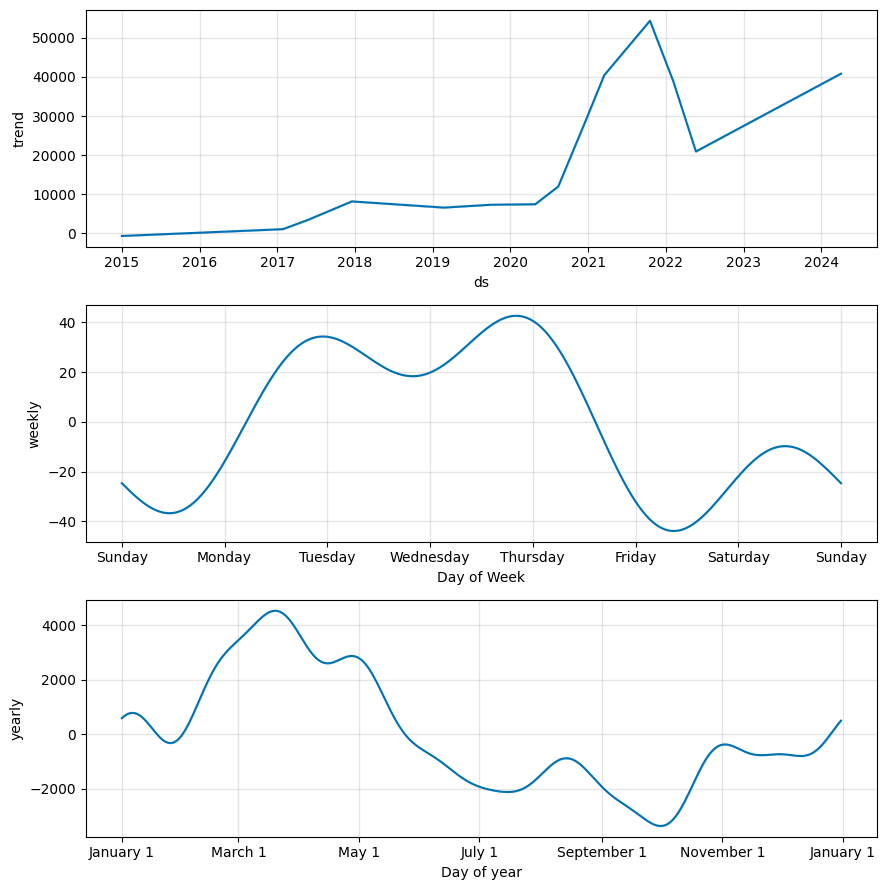

In [45]:
# Component visualization
fig2 = model.plot_components(forecast)
plt.show()


- The general trend appears to be upwards, with a significant increase expected in the coming years. However, volatility remains high, as indicated by the amplitude of the confidence interval.

- The bitcoin price seems to be influenced by weekly and annual seasonal factors. These seasonalities can be linked to specific events, buying patterns or economic cycles.


In [46]:
# Extract the results into a DataFrame
forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Show first lines of forecast
forecast_df.head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-01,-93.536714,-6803.050969,6953.415516
1,2015-01-02,-95.480691,-6765.427111,6553.108990
2,2015-01-03,-25.363056,-6015.205037,6567.997542
3,2015-01-04,19.876084,-6934.007627,6512.349131
4,2015-01-05,63.741837,-6502.827921,6507.929307


In [47]:
result_df = pd.merge(forecast_df, data_prophet[['ds', 'y']], on='ds', how='left')
result_df

#result_df.to_csv('bitcoin_forecast_with_actuals.csv', index=False)

,ds,yhat,yhat_lower,yhat_upper,y
0,2015-01-01,-93.536714,-6803.050969,6953.415516,313.992
1,2015-01-02,-95.480691,-6765.427111,6553.108990,314.446
2,2015-01-03,-25.363056,-6015.205037,6567.997542,286.572
3,2015-01-04,19.876084,-6934.007627,6512.349131,260.936
4,2015-01-05,63.741837,-6502.827921,6507.929307,273.220
...,...,...,...,...,...
3375,2024-03-30,44564.232259,37392.021157,51167.625876,NaN
3376,2024-03-31,44475.094341,37690.264315,51235.537839,NaN
3377,2024-04-01,44394.967186,37663.388846,51428.801805,NaN
3378,2024-04-02,44355.575090,37587.745205,51218.085086,NaN


In [48]:
result_df.columns = ['Date', 'Prévision', 'Intervalle Inférieur', 'Intervalle Supérieur', 'Réalité']
result_df

,Date,Prévision,Intervalle Inférieur,Intervalle Supérieur,Réalité
0,2015-01-01,-93.536714,-6803.050969,6953.415516,313.992
1,2015-01-02,-95.480691,-6765.427111,6553.108990,314.446
2,2015-01-03,-25.363056,-6015.205037,6567.997542,286.572
3,2015-01-04,19.876084,-6934.007627,6512.349131,260.936
4,2015-01-05,63.741837,-6502.827921,6507.929307,273.220
...,...,...,...,...,...
3375,2024-03-30,44564.232259,37392.021157,51167.625876,NaN
3376,2024-03-31,44475.094341,37690.264315,51235.537839,NaN
3377,2024-04-01,44394.967186,37663.388846,51428.801805,NaN
3378,2024-04-02,44355.575090,37587.745205,51218.085086,NaN


### RMSE (Root Mean Square Error)

In [49]:
from sklearn.metrics import mean_squared_error
import numpy as np

real_prices = data_prophet['y']

# Calculer le RMSE
rmse = np.sqrt(mean_squared_error(real_prices, forecast['yhat'][-len(real_prices):]))
print(f'RMSE: {rmse}')

RMSE: 5432.274132698008


An RMSE (Root Mean Square Error) of 15820.63 indicates that, on average, the Prophet model forecasts deviate from the actual Bitcoin price by around 15766.63 units.

In [50]:
import plotly.express as px
fig = px.line(data, x=forecast_df['ds'], y= forecast_df['yhat'], title="Prix du Bitcoin")

In [51]:
import plotly.io as pio
pio.renderers.default = "browser"
fig.show()
